In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
worksheet = gc.open('wine').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])

In [25]:
print("Shape of the dataset:", df.shape)
print("Column names:", df.columns.tolist())

df.head()

Shape of the dataset: (1103, 11)
Column names: ['', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']


,,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110,Northern Spain,Toro,,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66,Provence,Bandol,,Provence red blend,Domaine de la B√©gude


<ipython-input-28-9275ee654872>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
<ipython-input-28-9275ee654872>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
<ipython-input-28-9275ee654872>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
<ipython-input-28-9275ee654872>:17: FutureWarning: 

Passing `palette` without assigning `hue` is

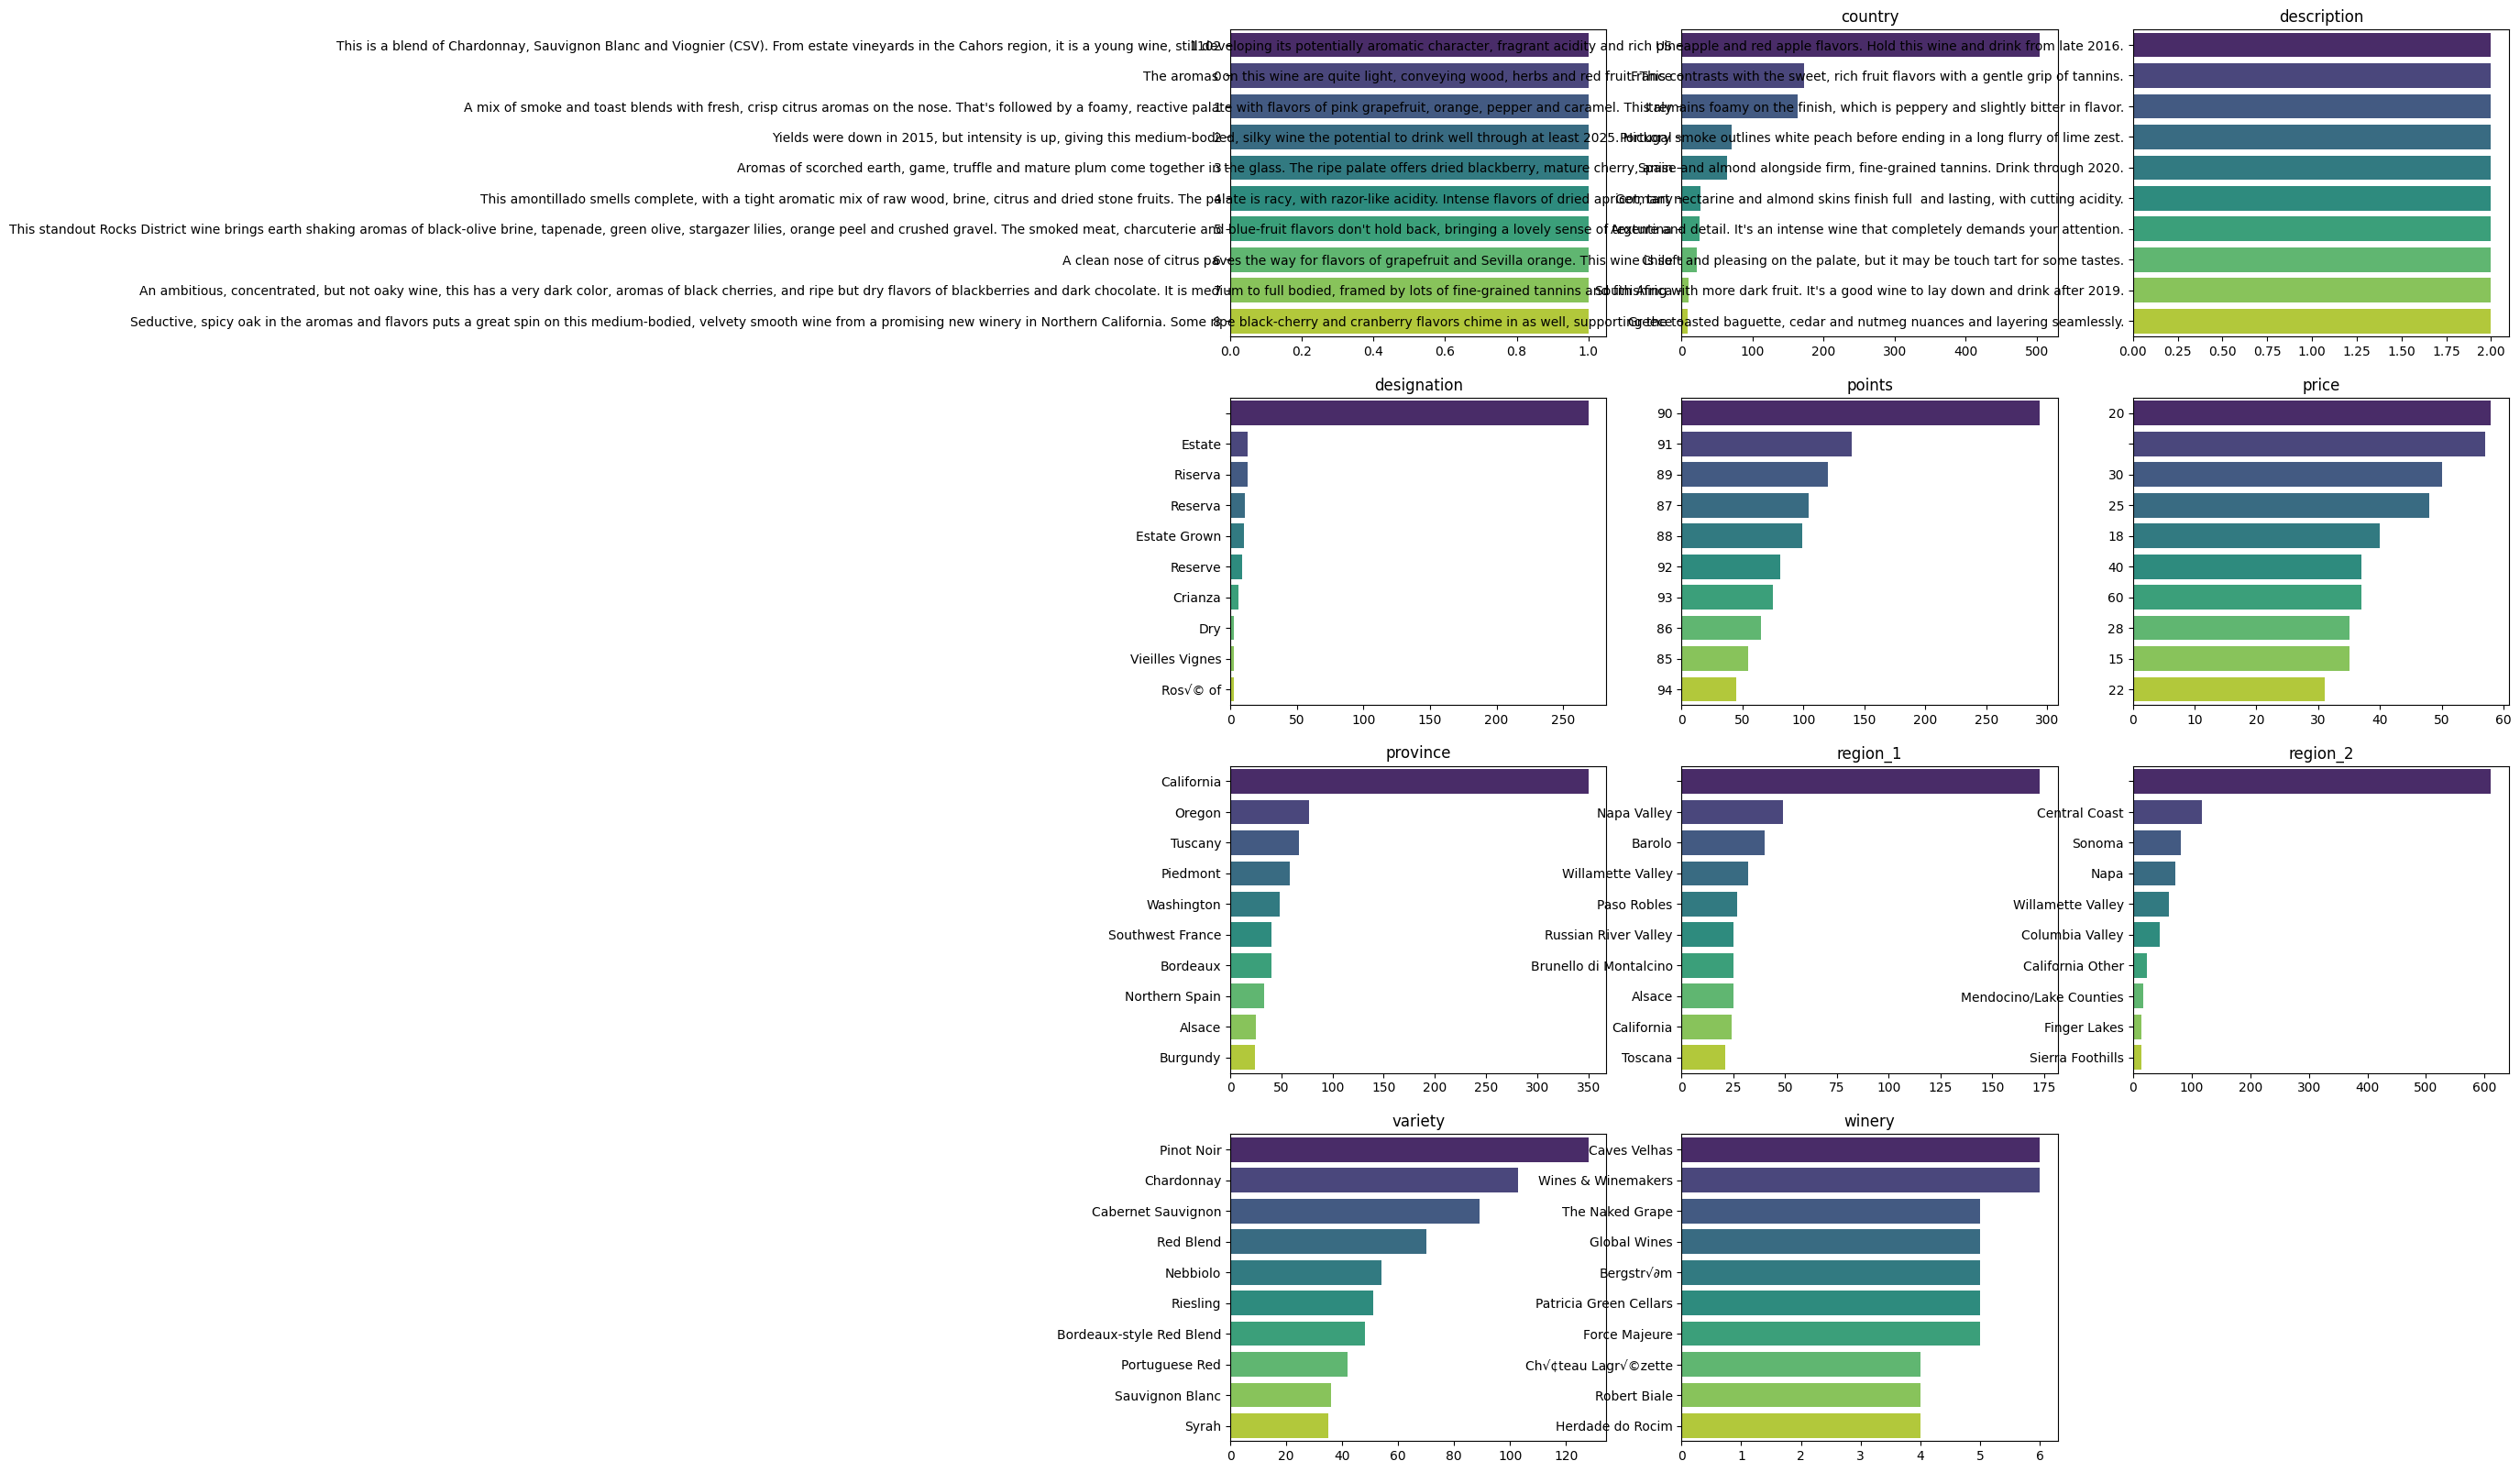

In [28]:
all_cols = df.columns
num_plots = len(all_cols)

cols = 3
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(6 * cols, 5 * rows))

for i, col in enumerate(all_cols, 1):
    plt.subplot(rows, cols, i)

    # Choose plot type based on data type or unique values
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 10:
        sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    else:
        top_categories = df[col].value_counts().nlargest(10)  # Limit to top 10
        sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')

    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [29]:
selected_varieties = ['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay']

filtered_df = df[df['variety'].isin(selected_varieties)]

print("Filtered dataset shape:", filtered_df.shape)
filtered_df['variety'].value_counts()


Filtered dataset shape: (320, 11)


,count
variety,
Pinot Noir,128
Chardonnay,103
Cabernet Sauvignon,89


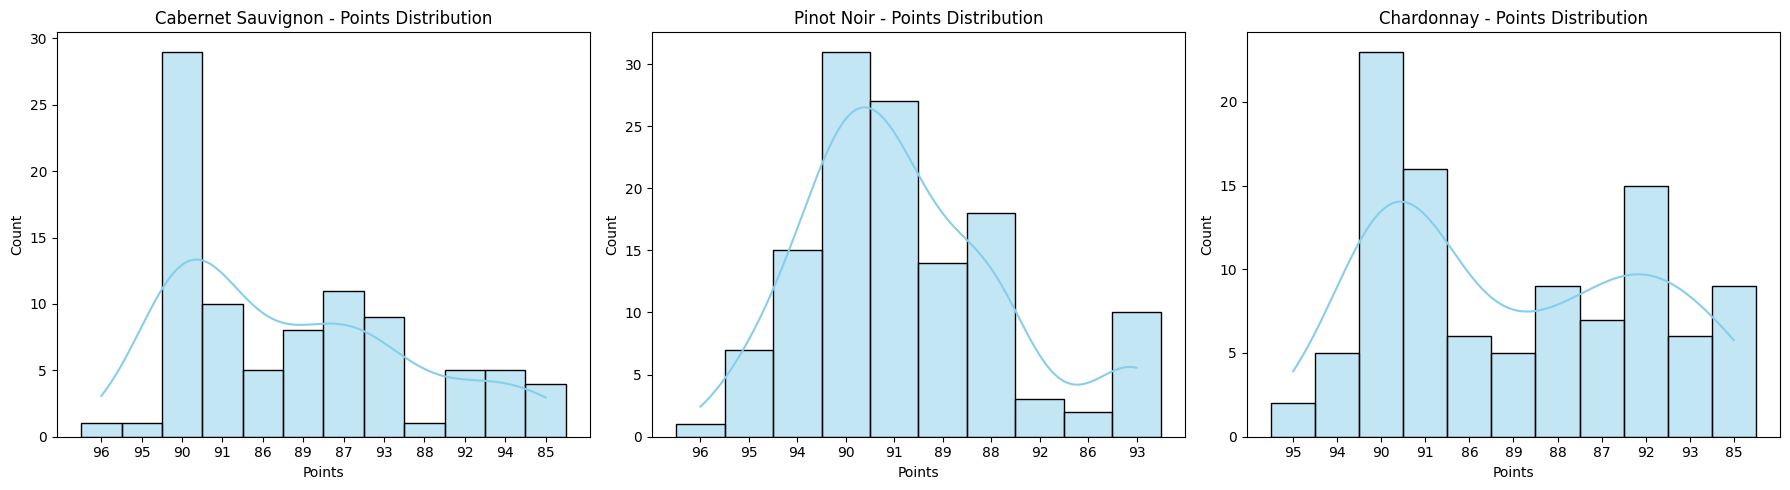

In [30]:
selected_varieties = ['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay']
filtered_df = df[df['variety'].isin(selected_varieties)]

plt.figure(figsize=(18, 5))

for i, variety in enumerate(selected_varieties, 1):
    plt.subplot(1, 3, i)
    sns.histplot(
        data=filtered_df[filtered_df['variety'] == variety],
        x='points',
        kde=True,
        bins=15,
        color='skyblue'
    )
    plt.title(f"{variety} - Points Distribution")
    plt.xlabel('Points')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()
